# Data visualization

In [1]:
import pandas as pd
from helpers import read_json_file, plot_bars, plot_most_common

In [10]:
# read data
train = pd.read_csv('../data/train_lemmatized.csv')
test = pd.read_csv('../data/test_lemmatized.csv')
# concatenate the two frames
df = pd.concat([train, test], ignore_index=True)

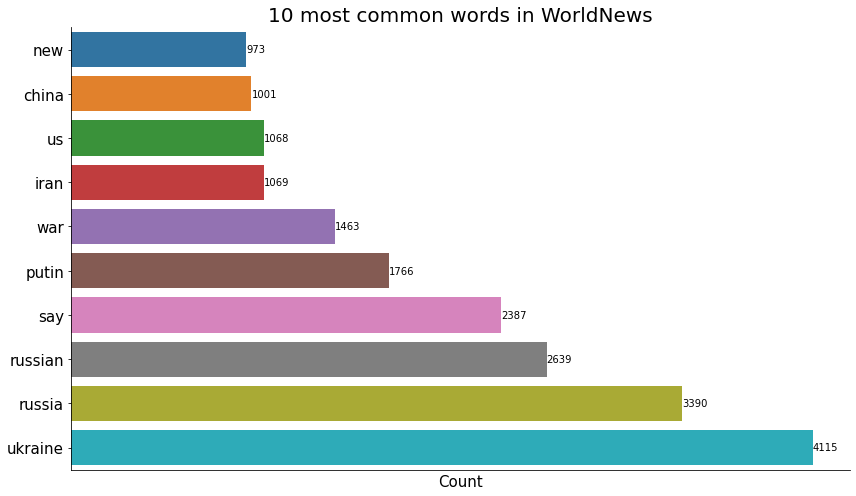

In [3]:
# plot
plot_most_common(df.loc[df['subreddit']=='worldnews', 'new_title'], 'WorldNews', size=10, 
                 filename='10_common_words_wn',
                 ngram_range=(1,2))

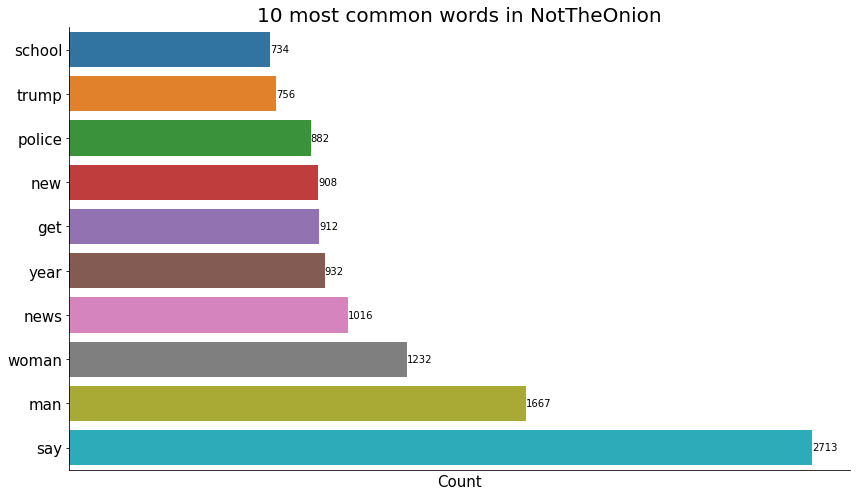

In [4]:
plot_most_common(df.loc[df['subreddit']=='nottheonion', 'new_title'], 'NotTheOnion', size=10, ngram_range=(1,2), 
                 filename='10_common_words_nto')

# Plot accuracy scores as bar plots

In [2]:
scores = read_json_file('scores')

In [3]:
df = pd.DataFrame(scores)

In [4]:
lm_cols = [c for c in df.columns if c.startswith('lm')]
baseline = df.loc[:, ~df.columns.isin(lm_cols)]

In [8]:
cvec_data, tvec_data = [(
    baseline.filter(like=mthd)
    .set_axis(['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Gradient Boost', 'SVC', 'Ensemble'], axis=1)
    .pipe(lambda x: x[x.loc['Test accuracy'].sort_values().index])
    .unstack()
    .rename_axis(['model', 'data'])
    .reset_index(name='Accuracy')
) for mthd in ['cvec', 'tvec']
]

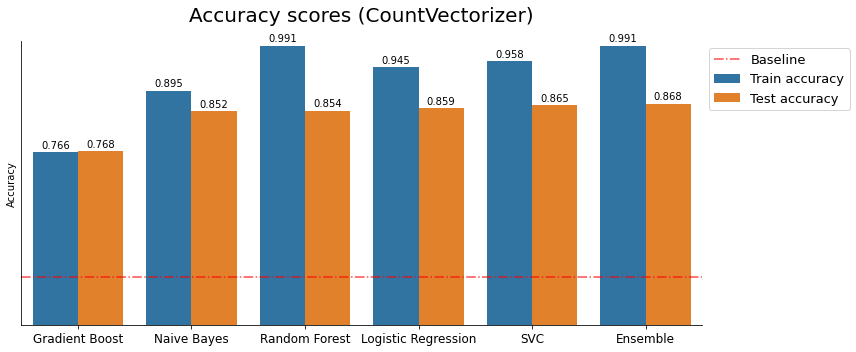

In [9]:
plot_bars(x='model', y='Accuracy', hue='data', data=cvec_data, to_filename='cvec_scores', 
          baseline=df['Baseline'].iat[0], title='Accuracy scores (CountVectorizer)')

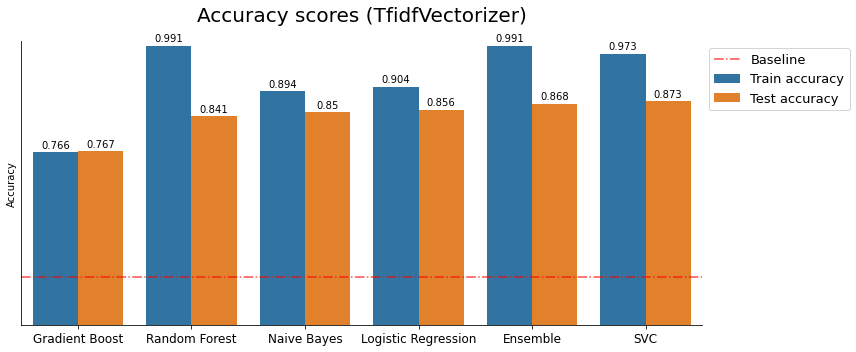

In [10]:
plot_bars(x='model', y='Accuracy', hue='data', data=tvec_data, to_filename='tvec_scores', 
          baseline=df['Baseline'].iat[0], title='Accuracy scores (TfidfVectorizer)')

## Accuracy scores of the final models

In [5]:
cvec_data_lm = (
    df[lm_cols]
    .set_axis(['Random Forest', 'Logistic Regression'], axis=1)
    .pipe(lambda x: x[x.loc['Test accuracy'].sort_values().index])
    .unstack()
    .rename_axis(['model', 'data'])
    .reset_index(name='Accuracy')
)

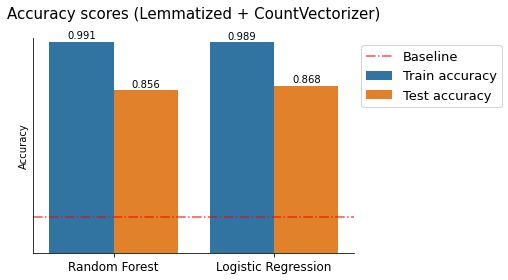

In [6]:
plot_bars(x='model', y='Accuracy', hue='data', data=cvec_data_lm, size=(7,4), to_filename='cvec_scores_lm', 
          baseline=df['Baseline'].iat[0], title='Accuracy scores (Lemmatized + CountVectorizer)', 
          fontsizes={'title': 15, 'label': 12})

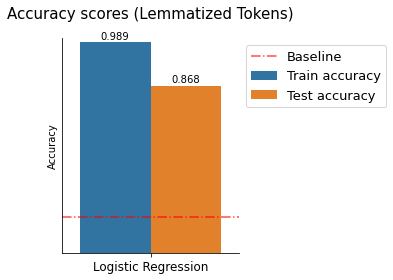

In [9]:
plot_bars(x='model', y='Accuracy', hue='data', data=cvec_data_lm.query('model.str.startswith("Log")'), 
          size=(5,4), to_filename='for_presentation', 
          baseline=df['Baseline'].iat[0], title='Accuracy scores (Lemmatized Tokens)', 
          fontsizes={'title': 15, 'label': 12})